### <<한글폰트설정>>

In [ ]:
# 단계 1: 한글폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (34.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120882 files and direc

In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [ ]:
# 단계 3: 맷플롯립 폰트 설정
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

### 1. 역대 가장 많은 **강수량**은 얼마였으며 **몇년도**에 어느 도시였을까요?( 5점)

In [ ]:
#파일오픈하고 데이터 갯수 확인(2점)
import csv

f= open("/content/rain.csv",encoding = "cp949")
data = csv.reader(f)
header = next(data)
data = list(data)
f.close()




#코드작성(3점)
city = ''
year = ''
pre = 0 #precipitation:강수량
count = 0

for row in data:
  if row[5]!='':
    if pre < float(row[5]):
      pre = float(row[5])
      city = row[0]
      year = row[1].split('-')[0]

  count+=1

print("데이타 갯수 :",count)
print("역대 가장 많은 강수량은 ", year,"연도 ", city, "에서 ", pre,"mm였다.", sep = '')


데이타 갯수 : 1386
역대 가장 많은 강수량은 2006연도 홍천에서 1288.5mm였다.


### 2. 2019년의 각 도시의 합계강수량이 400mm 이상인 지역을 세로막대그래프로 시각화하시오.(10점)
- 해상도:figsize = (7, 3)
- x 축값 기울이기 : plt.xticks(rotation =45)

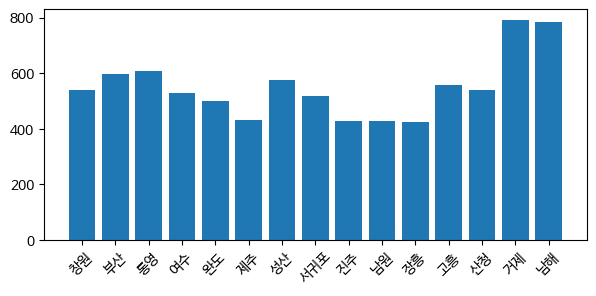

In [ ]:
city = []
rain = []

for row in data:
  if row[1].split('-')[0] == "2019" and float(row[5]) >= 400:
    city.append(row[0])
    rain.append(float(row[5]))

import matplotlib.pyplot as plt


plt.figure(figsize=(7,3))
plt.xticks(rotation =45)
plt.bar(city,rain)
plt.show()


### 3. 타이타닉 데이터의 결손치를 확인하려고 한다. 실행결과처럼 확인하기 위해 필요한 코드를 적으시오.(5점)
- <<실행 결과>>

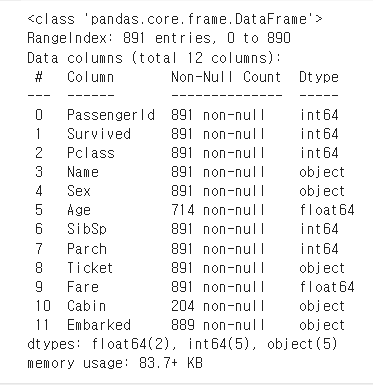

In [ ]:
#파일오픈(1점)
import pandas as pd

data = pd.read_csv("/content/train.csv")

#판다스모듈을 이용해 파일을 데이타프레임 형태로 로딩(3점)

dataFrame = pd.DataFrame(data)


#칼럼의 타입, NULL데이터개수, 데이터 분포도 등의 메타데이터(구조화된 데이터) 등 조회(1점)
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 4. 여성과 남성 중 어떤  성별이 더 생존확률이 높을까요? 원형그래프로 시각화하세요.(10점)
- 해상도 : dpi=80
- 색상 : 결과대로 해도 되고, 각자 알아서 해도 됩니다.

In [ ]:
import csv

f= open("/content/train.csv",encoding = "cp949")
data = csv.reader(f)
header = next(data)
data = list(data)
f.close()

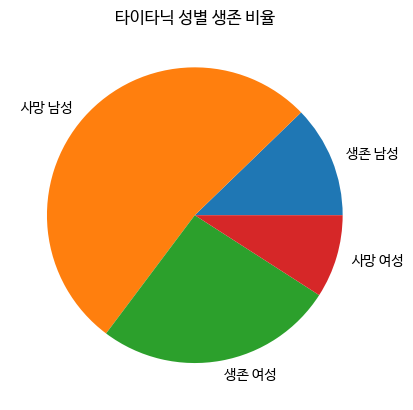

In [ ]:
#성별 별 생존자 수 (survivers by gender)
SBG = {'생존 남성' : 0, '사망 남성': 0, '생존 여성': 0, '사망 여성':0}

for row in data:
  if row[4] == 'male':
    if float(row[1])==1:
      SBG['생존 남성'] +=1
    else:
      SBG['사망 남성'] +=1
  else:
    if float(row[1])==1:
      SBG['생존 여성'] +=1
    else:
      SBG['사망 여성'] +=1




import matplotlib.pyplot as plt

plt.title("타이타닉 성별 생존 비율")
plt.pie(SBG.values(),labels = SBG.keys())
plt.show()

### 5. 어떤 등급의 티켓을 구매한 사람이 더 많이 생존했을까요?(10점)
- 해상도 : dpi=70
- 색상 : 결과대로 해도 되고, 각자 알아서 해도 됩니다.

[136, 80, 87, 97, 119, 372]


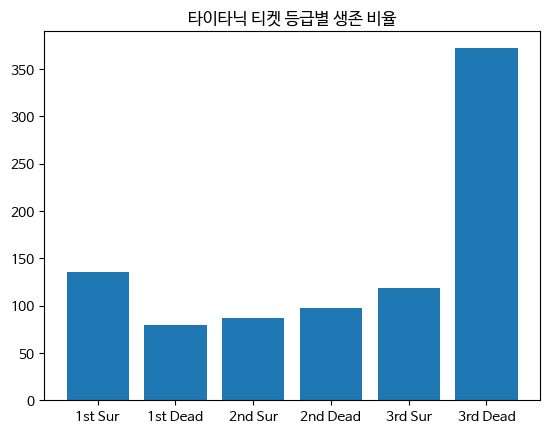

In [ ]:
Ticket = ['1st Sur', '1st Dead','2nd Sur', '2nd Dead','3rd Sur', '3rd Dead']
corre = [0,0,0,0,0,0]

for row in data:
  if int(row[2]) == 1:
    if int(row[1]) == 1:
      corre[0] +=1
    else:
      corre[1] +=1
  elif int(row[2]) == 2:
    if int(row[1]) == 1:
      corre[2] +=1
    else:
      corre[3] +=1

  else:
    if int(row[1]) == 1:
      corre[4] +=1
    else:
      corre[5] +=1

print(corre)

import matplotlib.pyplot as plt

plt.title("타이타닉 티켓 등급별 생존 비율")
plt.bar(Ticket,corre)
plt.show()